In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import logging
import xgboost as xgb
from sklearn import svm
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix


In [2]:
logging.basicConfig(level=logging.INFO)

In [3]:
input_csv = '../model_training/csv/dataset_norm.csv'
df = pd.read_csv(input_csv)
logging.info(df.head())

INFO:root:    ID                                               text  \
0  268  b"resume samples\nthese sample develop illustr...   
1  965  b'allyhunt sample resume fresh graduate\n\nraz...   
2  211  b'charle babbage\n1101 kahn lane\nbaltimore md...   
3  178  b'steve mostovoy\n[address withhold web \xe2\x...   
4  884  b'entry level engineer\naddress phone number e...   

                    class  class_number  senior  Unnamed: 5  
0  INFORMATION-TECHNOLOGY            20       0         NaN  
1             ENGINEERING            15       0         NaN  
2  INFORMATION-TECHNOLOGY            20       0         NaN  
3  INFORMATION-TECHNOLOGY            20       0         NaN  
4             ENGINEERING            15       0         NaN  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['senior'], test_size=0.25, random_state=None, stratify=df['senior']
)

In [5]:
def plot_confusion_matrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    correct_sum = sum(conf_mat[i][i] for i in range(conf_mat.shape[0]))
    incorrect_sum = sum(sum(row) for row in conf_mat) - correct_sum
    print(f"Correct predictions: {correct_sum}")
    print(f"Incorrect predictions: {incorrect_sum}")
    plt.figure(figsize=(20, 10)) 
    plt.imshow(conf_mat, interpolation='nearest', cmap='Purples')
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    labels = ['Junior', 'Pleno', 'Senior']
    plt.xticks(range(conf_mat.shape[1]), labels)
    plt.yticks(range(conf_mat.shape[0]), labels)
    
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            plt.text(j, i, str(conf_mat[i, j]), ha="center", va="center", color="red")
    
    plt.show()

In [6]:
def plot_accuracies(accuracies):
  models = list(accuracies.keys())
  acc_values = list(accuracies.values())
  cmap = plt.cm.tab10 
  colors = cmap(np.arange(len(models)) % cmap.N)
  plt.figure(figsize=(10, 8))
  bars = plt.bar(models, acc_values, color=colors)
  for bar, acc in zip(bars, acc_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=8)
  plt.ylabel('Accuracies')
  plt.ylim([0, 1])
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [7]:
def train_naive_bayes(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [8]:
def train_random_forest(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = RandomForestClassifier()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [9]:
def train_bernoulli(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = BernoulliNB()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [10]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [11]:
def train_knn(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = KNeighborsClassifier(n_neighbors=9)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [12]:
def train_xgboost(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = xgb.XGBClassifier()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [13]:
def train_svm(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = svm.SVC()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [14]:
def train_xgboost2(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=1000, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, reg_lambda=1)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [15]:
def train_catboost(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    train_pool = Pool(data=X_train_tfidf, label=y_train)
    test_pool = Pool(data=X_test_tfidf, label=y_test)
    clf = CatBoostClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=1000,
        l2_leaf_reg=0
    )
    clf.fit(train_pool, verbose=0)
    y_pred = clf.predict(test_pool)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)

    return accuracy

Accuracy: 0.453125
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.84      0.61       107
           1       0.35      0.37      0.36       106
           2       0.80      0.15      0.25       107

    accuracy                           0.45       320
   macro avg       0.54      0.45      0.41       320
weighted avg       0.54      0.45      0.41       320

Correct predictions: 145
Incorrect predictions: 175


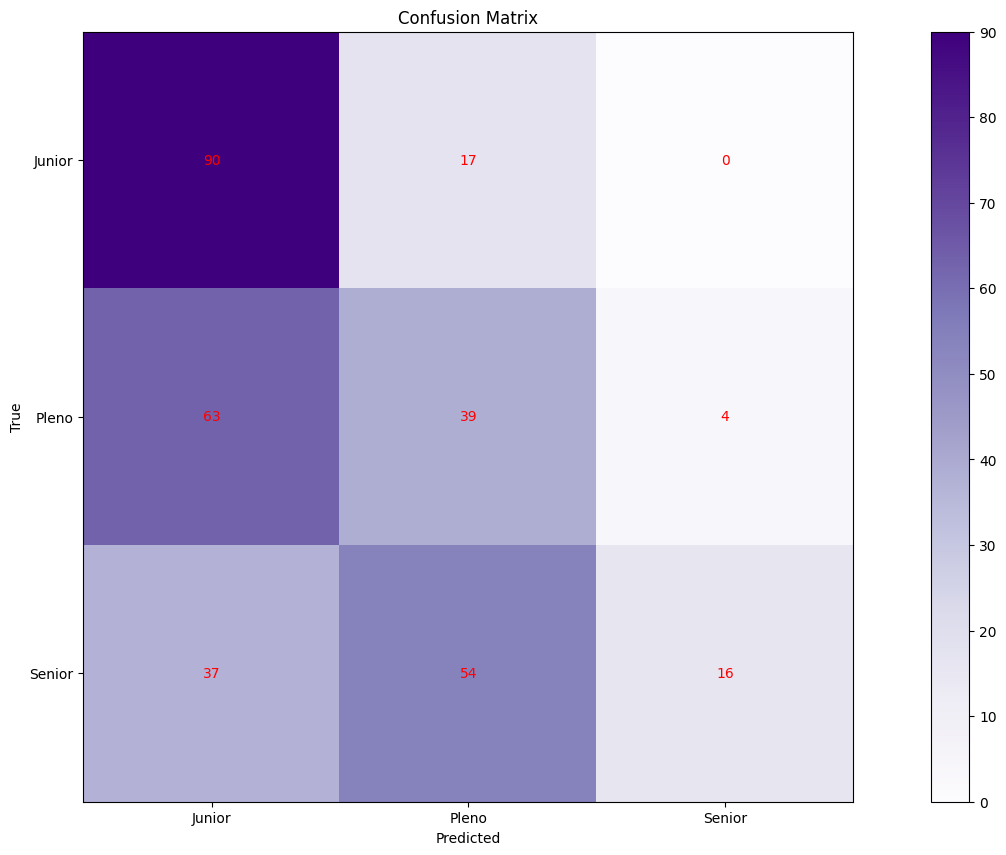

In [16]:
knn_accuracy = train_knn(X_train, y_train, X_test, y_test)


Accuracy: 0.69375
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       107
           1       0.60      0.67      0.63       106
           2       0.74      0.74      0.74       107

    accuracy                           0.69       320
   macro avg       0.70      0.69      0.70       320
weighted avg       0.70      0.69      0.70       320

Correct predictions: 222
Incorrect predictions: 98


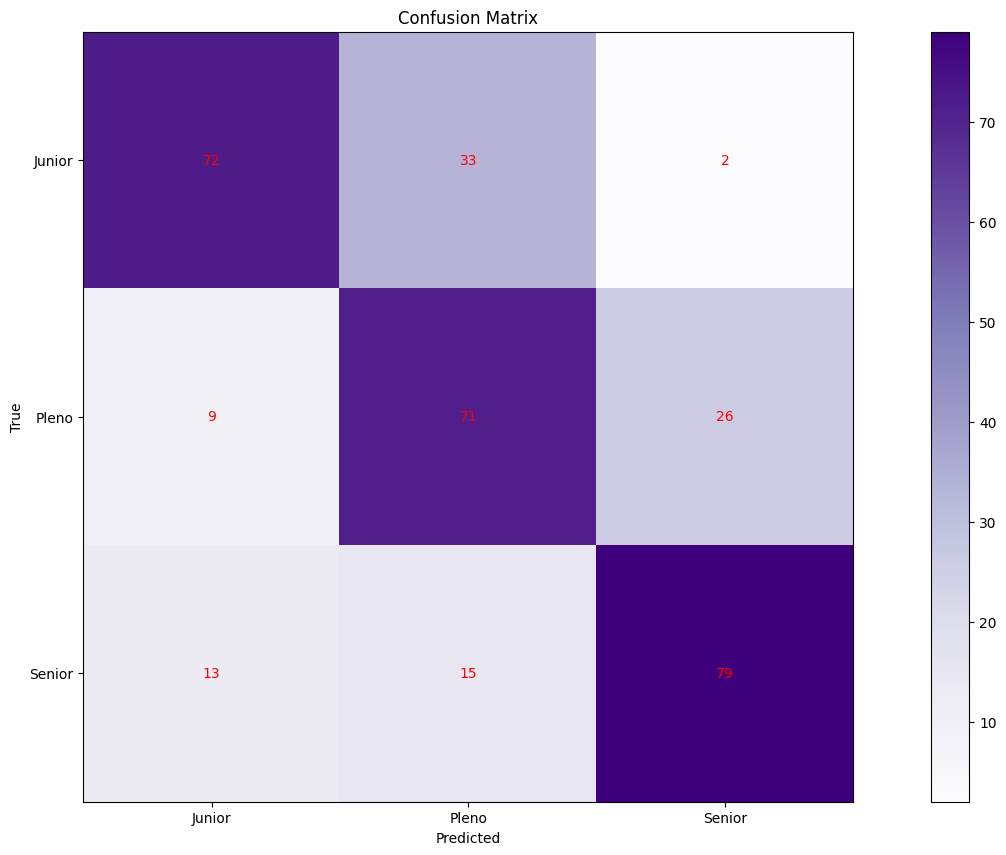

In [17]:
nb_accuracy = train_naive_bayes(X_train, y_train, X_test, y_test)


Accuracy: 0.75625
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.68      0.63      0.66       106
           2       0.74      0.78      0.76       107

    accuracy                           0.76       320
   macro avg       0.75      0.76      0.75       320
weighted avg       0.75      0.76      0.75       320

Correct predictions: 242
Incorrect predictions: 78


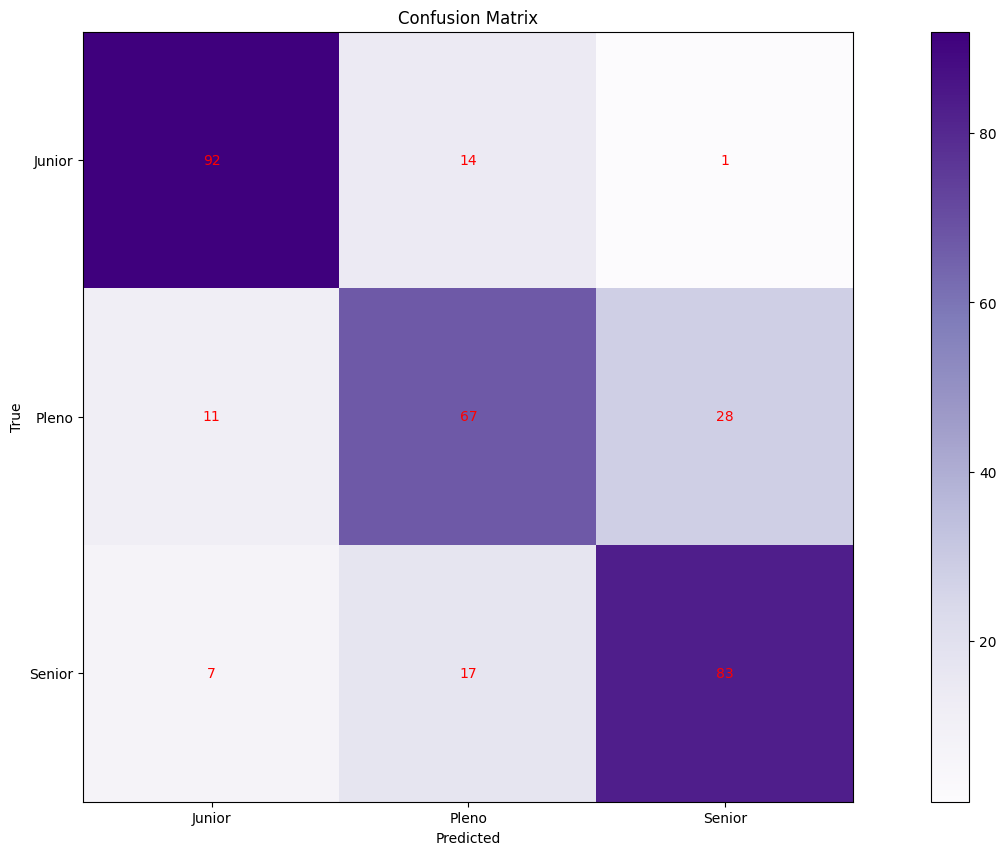

In [18]:
rf_accuracy = train_random_forest(X_train, y_train, X_test, y_test)

Accuracy: 0.7375
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.67      0.69      0.68       106
           2       0.73      0.64      0.69       107

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.73       320
weighted avg       0.74      0.74      0.74       320

Correct predictions: 236
Incorrect predictions: 84


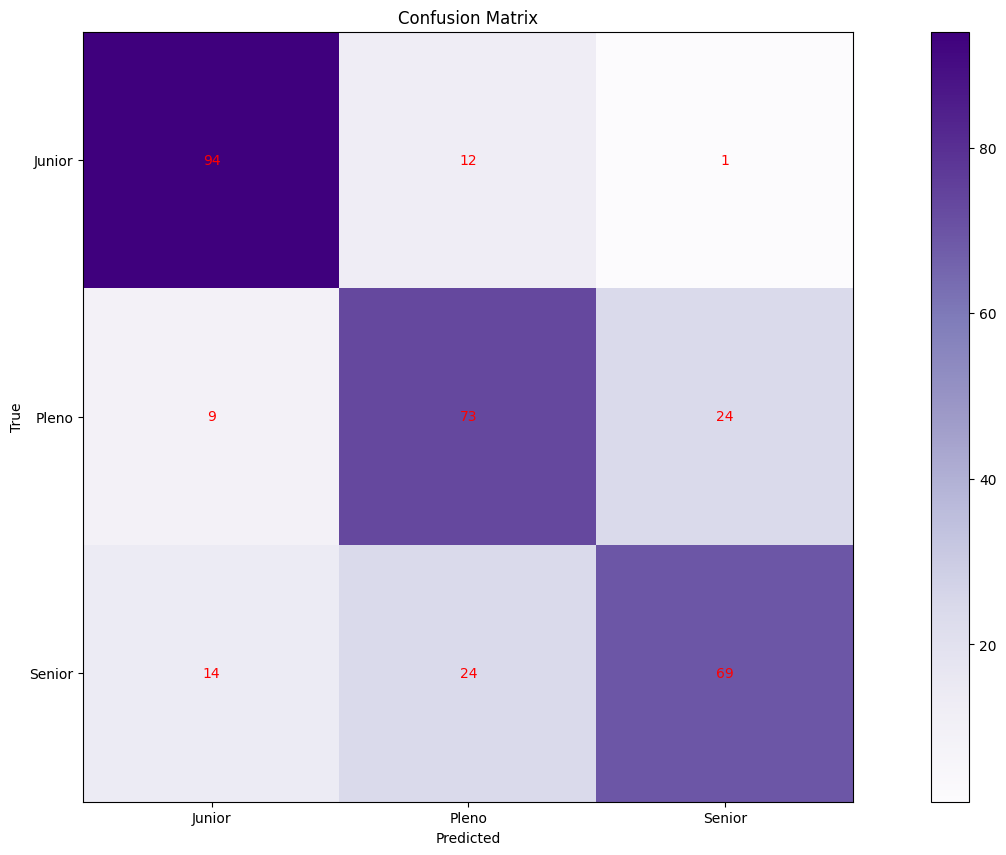

In [19]:
lr_accuracy = train_logistic_regression(X_train, y_train, X_test, y_test)


Accuracy: 0.675
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71       107
           1       0.53      0.84      0.65       106
           2       0.82      0.59      0.68       107

    accuracy                           0.68       320
   macro avg       0.74      0.68      0.68       320
weighted avg       0.74      0.68      0.68       320

Correct predictions: 216
Incorrect predictions: 104


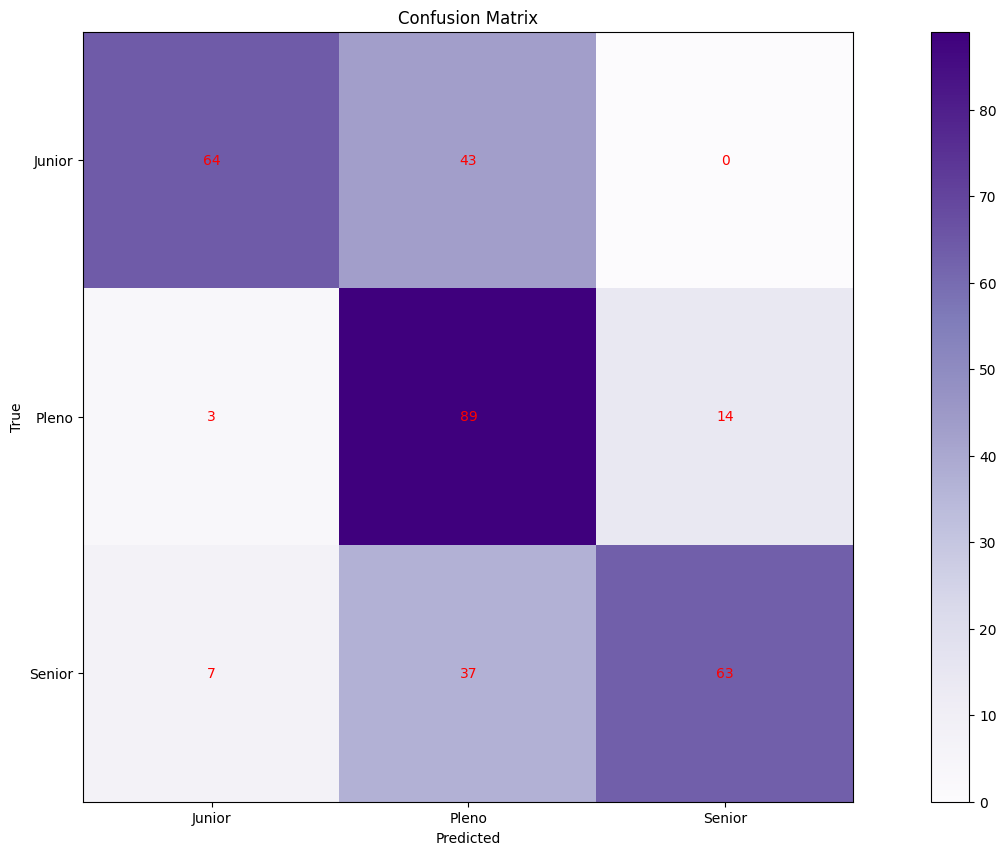

In [20]:
br_accuracy = train_bernoulli(X_train, y_train, X_test, y_test)


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.65      0.64      0.64       106
           2       0.75      0.75      0.75       107

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

Correct predictions: 240
Incorrect predictions: 80


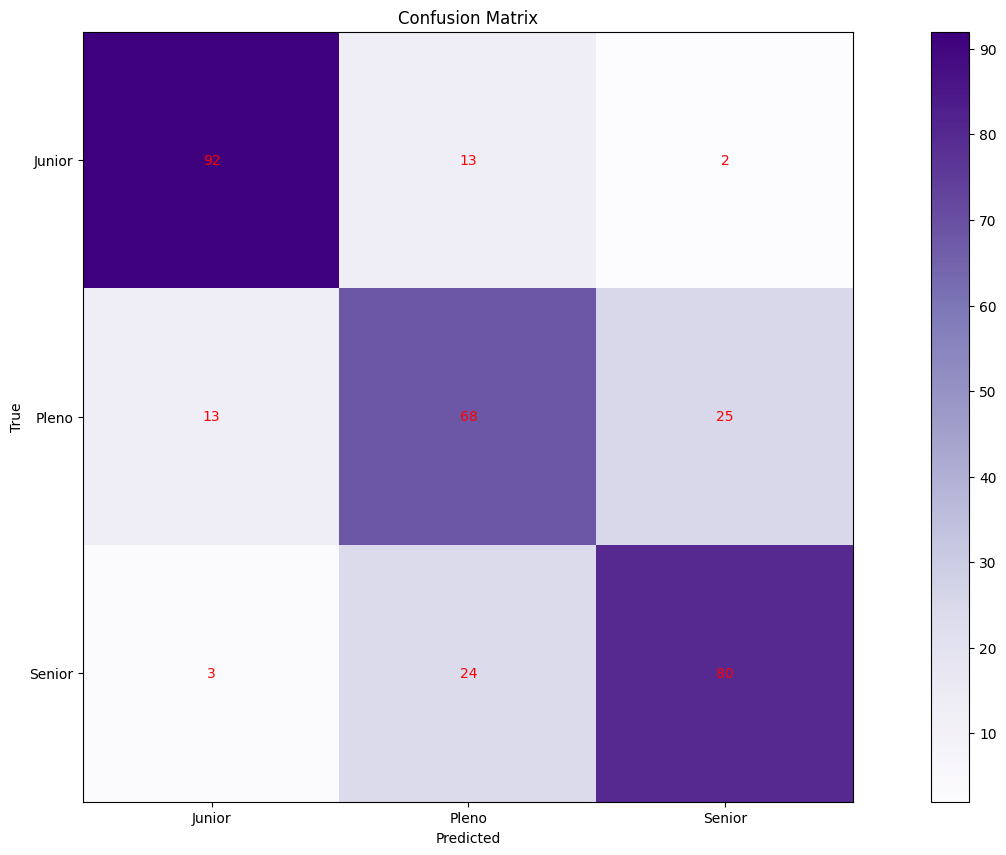

In [21]:
xg_accuracy = train_xgboost(X_train, y_train, X_test, y_test)


Accuracy: 0.646875
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       107
           1       0.57      0.52      0.54       106
           2       0.71      0.57      0.63       107

    accuracy                           0.65       320
   macro avg       0.65      0.65      0.64       320
weighted avg       0.65      0.65      0.64       320

Correct predictions: 207
Incorrect predictions: 113


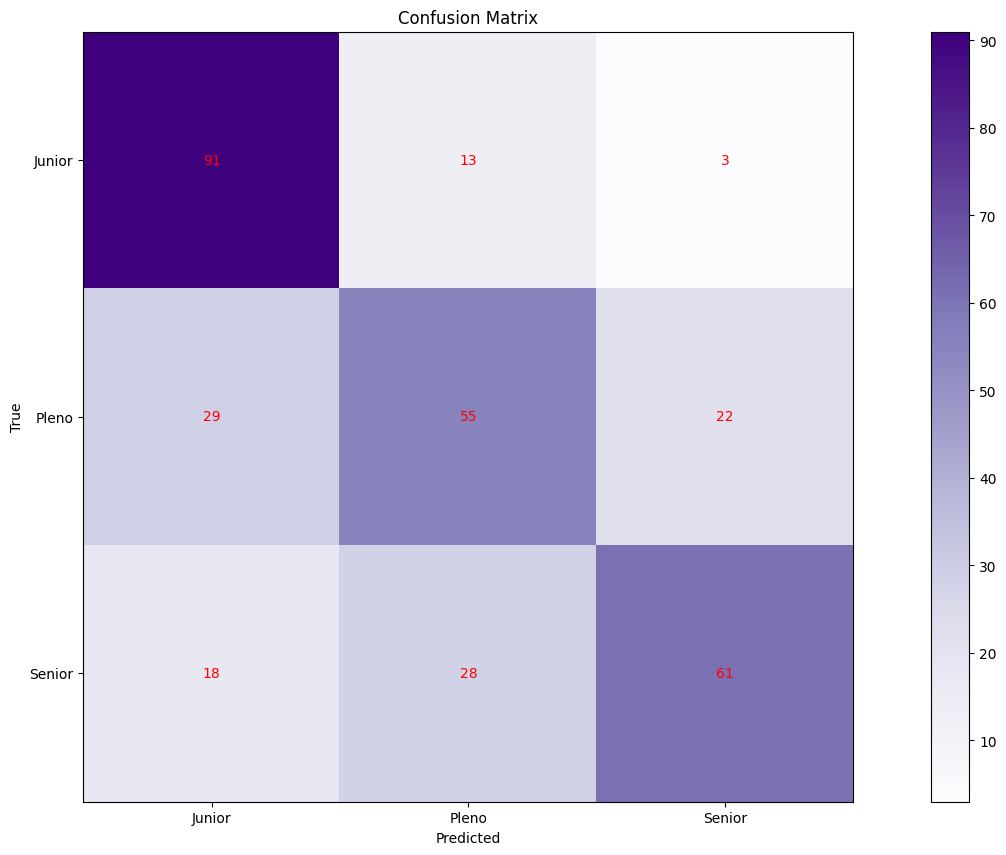

In [22]:
svm_accuracy = train_svm(X_train,y_train,X_test,y_test)


Accuracy: 0.746875
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.65      0.60      0.62       106
           2       0.73      0.76      0.74       107

    accuracy                           0.75       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.74      0.75      0.74       320

Correct predictions: 239
Incorrect predictions: 81


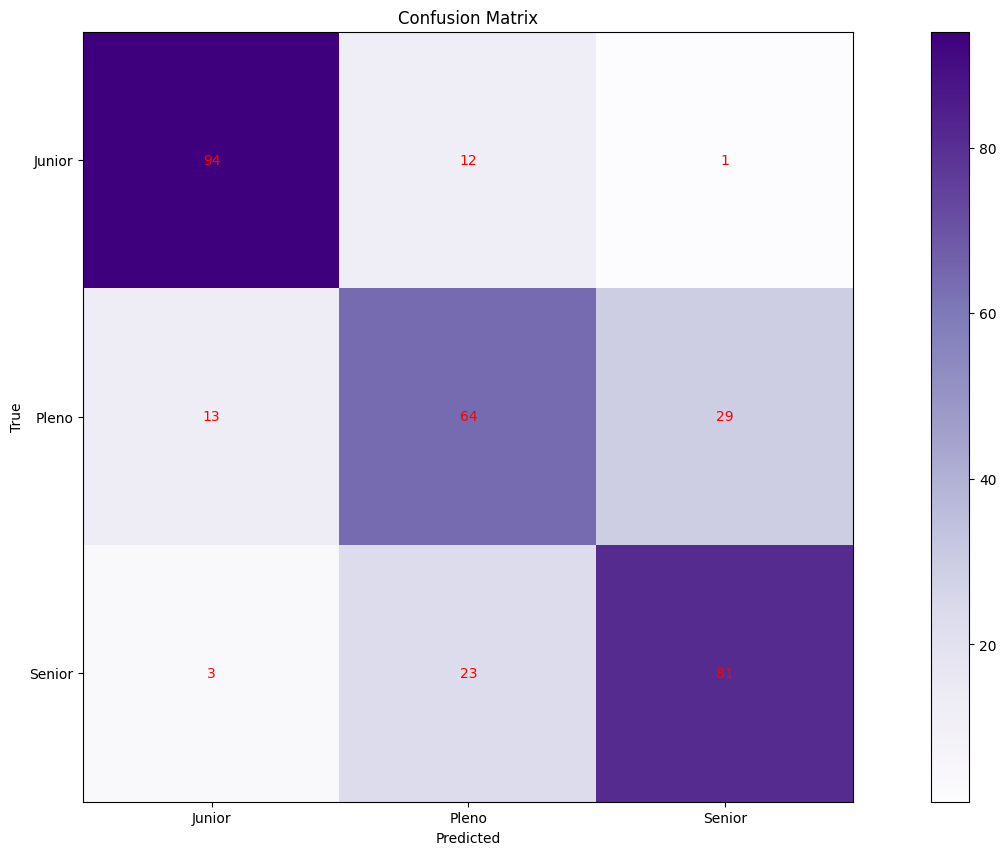

In [23]:
xg_accuracy2 = train_xgboost2(X_train, y_train, X_test, y_test)


Accuracy: 0.746875
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.66      0.61      0.64       106
           2       0.72      0.76      0.74       107

    accuracy                           0.75       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.74      0.75      0.75       320

Correct predictions: 239
Incorrect predictions: 81


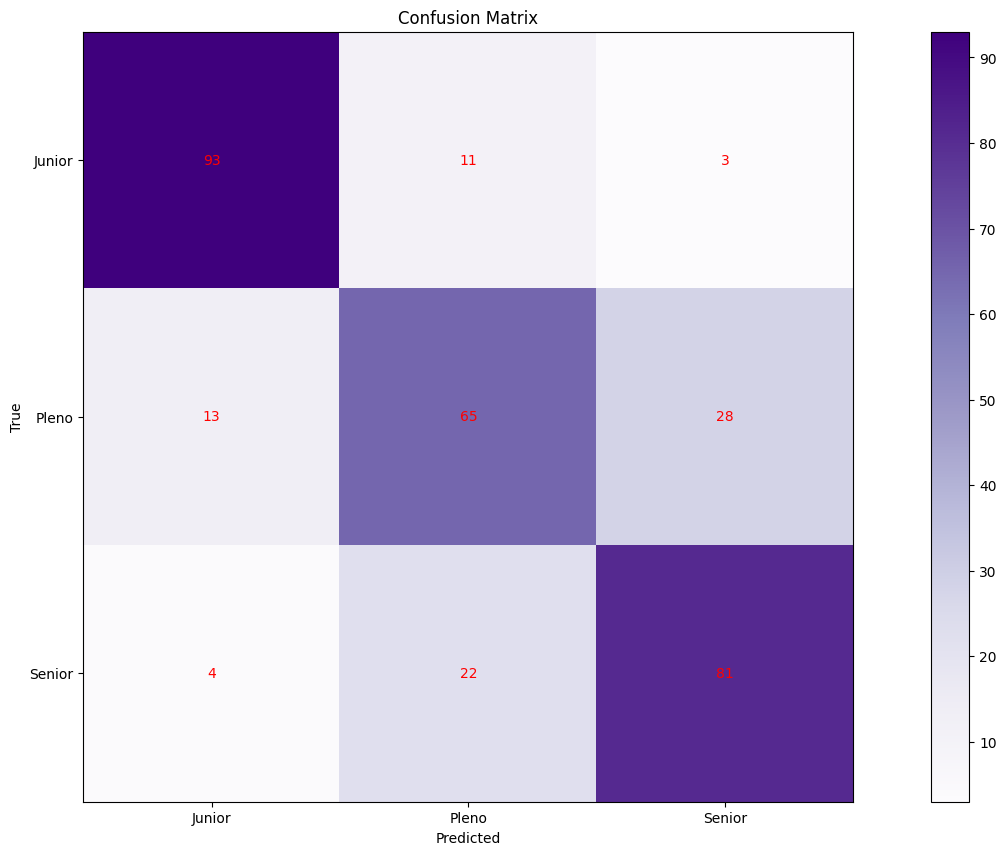

In [24]:
cat_accuracy = train_catboost(X_train,y_train,X_test,y_test)

In [25]:
accuracies = {
    'Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Bernoulli': br_accuracy,
    'KNN = 9': knn_accuracy,
    'XGBoost': xg_accuracy,
    'SVM' : svm_accuracy,
    'XGBoost2' : xg_accuracy2,
    'Cat' : cat_accuracy
}

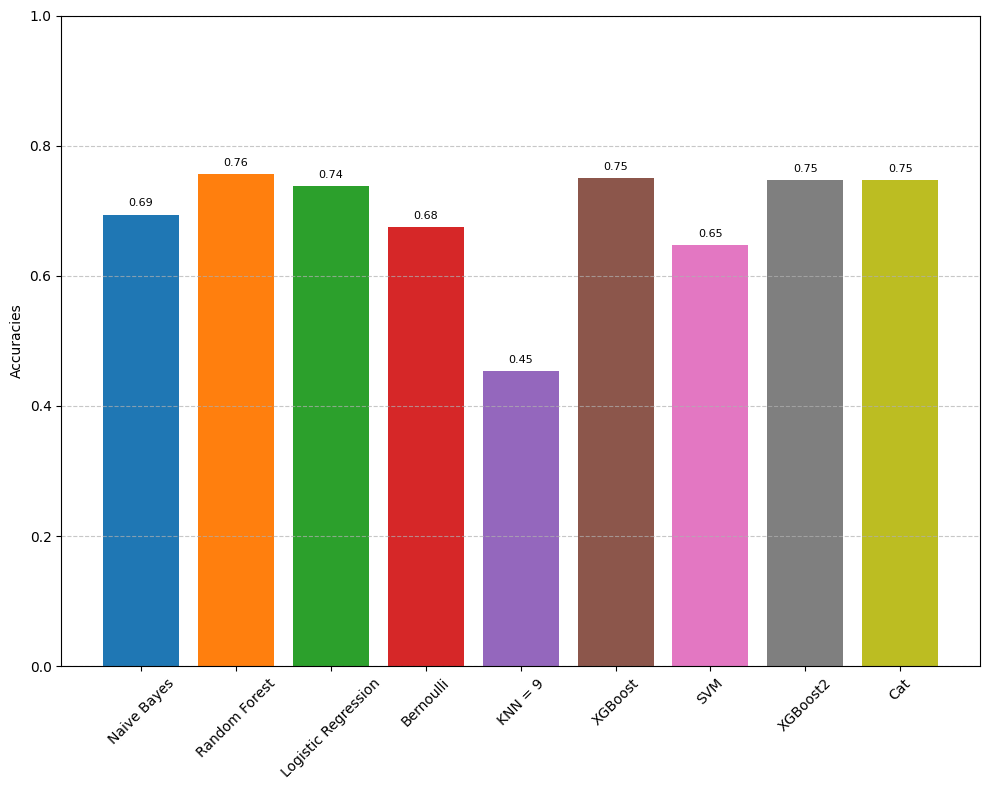

In [26]:
plot_accuracies(accuracies)

In [27]:
def train_knn_multiple_n(X_train, y_train, X_test, y_test, n_neighbors_list):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    
    accuracies = []
    
    for n in n_neighbors_list:
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X_train_counts, y_train)
        y_pred = clf.predict(X_test_counts)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

In [28]:

def plot_accuraciesK(n_neighbors_list, accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(n_neighbors_list, accuracies, marker='o')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN')
    plt.grid(True)
    plt.show()

In [29]:
n_neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuraciesK = train_knn_multiple_n(X_train, y_train, X_test, y_test, n_neighbors_list)

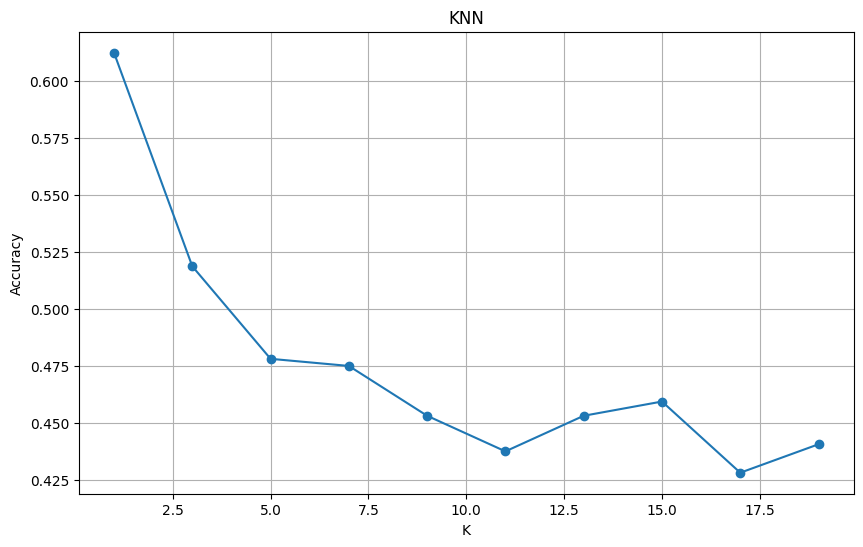

In [30]:
plot_accuraciesK(n_neighbors_list, accuraciesK)